# Answer template

Please use this notebook for your coursework. Feel free to add more cells for your code and answers, but try to stick to this format. This will make it easier to mark everyone's work fairly.

___________________

In [ ]:
# run this
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.6
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.1.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.13.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bidict                           0.22.1
b

# Part A – Exploratory data analysis and data visualisation

1. Using the pandas library, read the file dataset1.csv into a dataframe. Print or display the first five rows of the dataset. [1 mark]

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
d1=pd.read_csv("/content/drive/MyDrive/project/dataset1 (1).csv")

In [ ]:
d1.head()

,Monastery,Latitude,Longitude,City,Country,Administrative Region,Historical Region,Starting,Ending,Monastery_index
0,Cistercians,47.13,15.28,Seckau,Austria,Steiermark,STYRIA (AUSTRIA),1130,1958,0
1,Cistercians,48.05,16.13,Vienne,Austria,Niederoesterreich,STYRIA (AUSTRIA),1135,2011,0
2,Cistercians,48.61,15.20,Sanct Pölten,Austria,Niederoesterreich,STYRIA (AUSTRIA),1138,2011,0
3,Cistercians,48.20,14.74,Linz,Austria,Oberoesterreich,STYRIA (AUSTRIA),1142,1784,0
4,Cistercians,48.32,14.17,Linz,Austria,Oberoesterreich,STYRIA (AUSTRIA),1146,1945,0


2. Make a scatterplot from the dataset, with the Longitude column on the x axis, the Latitude column on the y axis, and the colour corresponding to the Monastery_index column. Within the scatterplot function, set the colour map to ’rainbow’. The result should be a scatterplot showing the position of every monastery, with different colours for monasteries with different values in Monastery_index.  [1 mark]

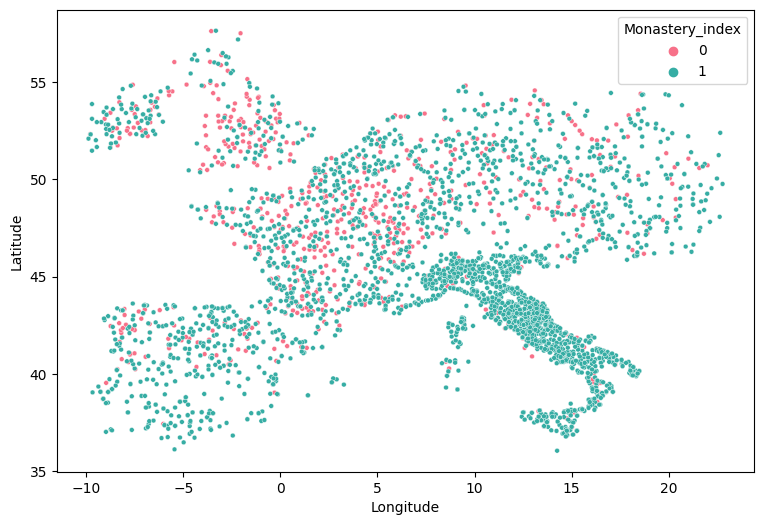

In [ ]:
from seaborn.widgets import color_palette
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax=plt.subplots(figsize=(9,6))
sns.scatterplot(x="Longitude",y="Latitude",data=d1,hue="Monastery_index",palette="husl",s=12);

3. Plot a histogram for the monastery starting year of activity, represented in the Starting column.
Add the title “Starting year” to the plot. [1 mark]

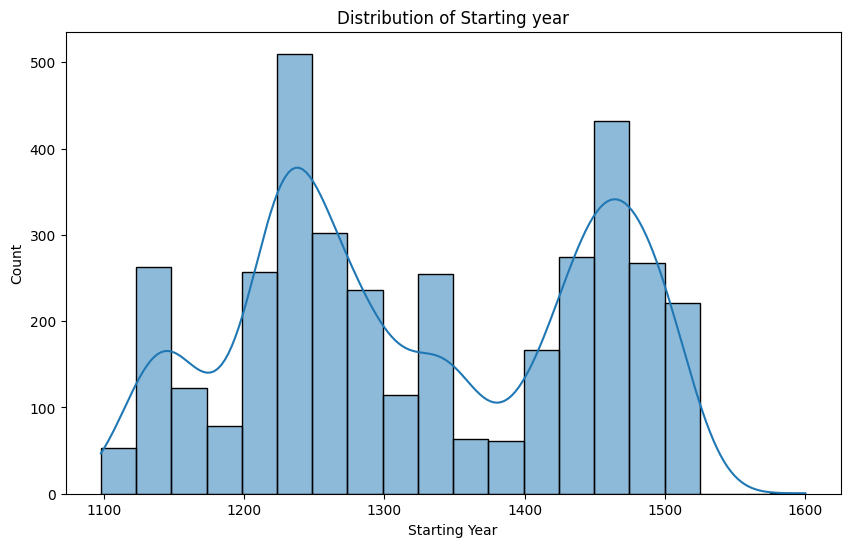

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=d1,x="Starting",bins=20, kde=True)
plt.xlabel("Starting Year")
plt.title("Distribution of Starting year");

4. Make a figure with two histograms, still using the Starting column:

a) One histogram representing the Cistercian monasteries, corresponding to rows in the dataframe where the Monastery column is equal to 'Cistercians'.

b) And one histogram representing the Franciscan monasteries, corresponding to rows in the dataframe where the Monastery column is equal to 'Franciscans'.

c) Add a legend indicating which histogram corresponds to which type of monastery.

d) Add the title “Starting year” to the figure.

[2 marks]

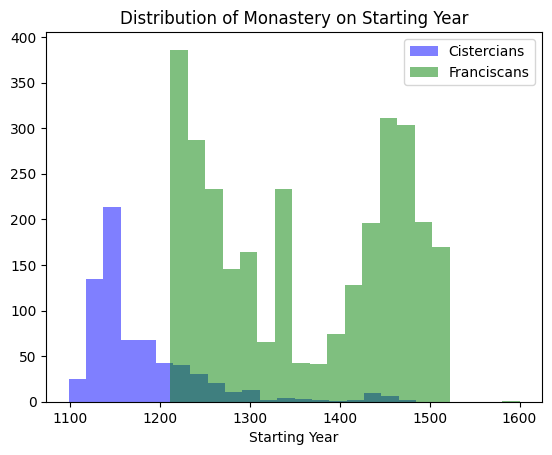

In [ ]:
fig,ax=plt.subplots()
ax.hist(d1.loc[d1["Monastery"]=="Cistercians","Starting"], color='blue', bins=20,alpha=0.5,label="Cistercians")
ax.hist(d1.loc[d1["Monastery"]=="Franciscans","Starting"], color='green',bins=20, alpha=0.5,label="Franciscans")
plt.legend()
ax.set_xlabel("Starting Year")
plt.title("Distribution of Monastery on Starting Year");

5. Repeat numbers 3 and 4, but for the Ending column. Add the title “Ending year” to the plot.
[2 marks]

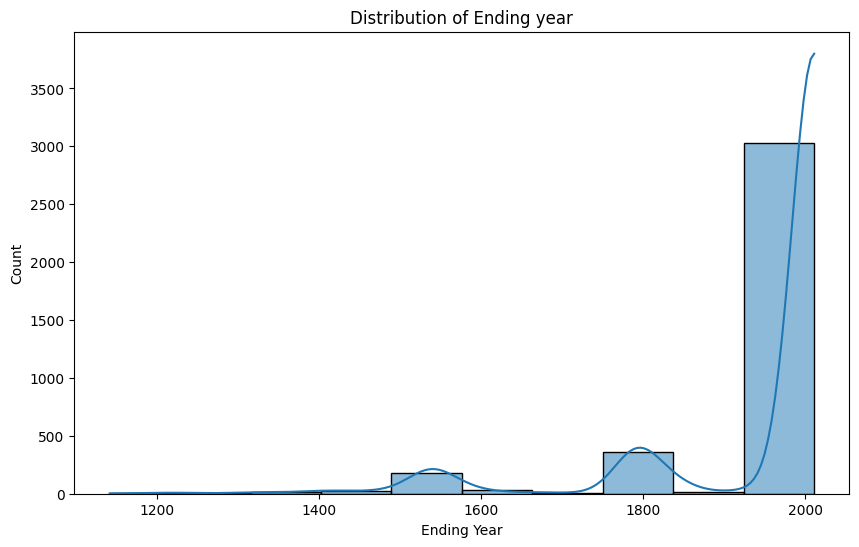

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=d1,x="Ending",bins=10, kde=True)
plt.xlabel("Ending Year")
plt.title("Distribution of Ending year");

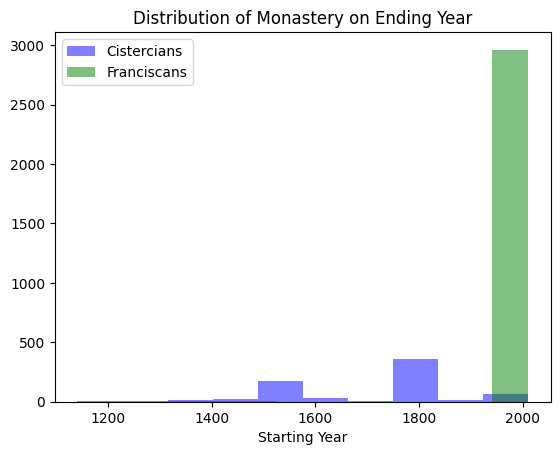

In [ ]:
fig,ax=plt.subplots()
ax.hist(d1.loc[d1["Monastery"]=="Cistercians","Ending"], color='blue', bins=10,alpha=0.5,label="Cistercians")
ax.hist(d1.loc[d1["Monastery"]=="Franciscans","Ending"], color='green',bins=10, alpha=0.5,label="Franciscans")
plt.legend()
ax.set_xlabel("Starting Year")
plt.title("Distribution of Monastery on Ending Year");

6. Count the number of times each country appears in the Country column. Use that to make a bar plot, showing one bar for each country, with the bar height representing how many times each country appears in the Country column. This corresponds to the number of monasteries found in each country.
[2 marks]

In [ ]:
sample=pd.DataFrame(d1["Country"].value_counts())
sample

,Country
Italy,1453
France,724
Spain,418
Germany,276
UK,180
Poland,129
Ireland,90
Hungary,69
Czech Republic,63
Portugal,59


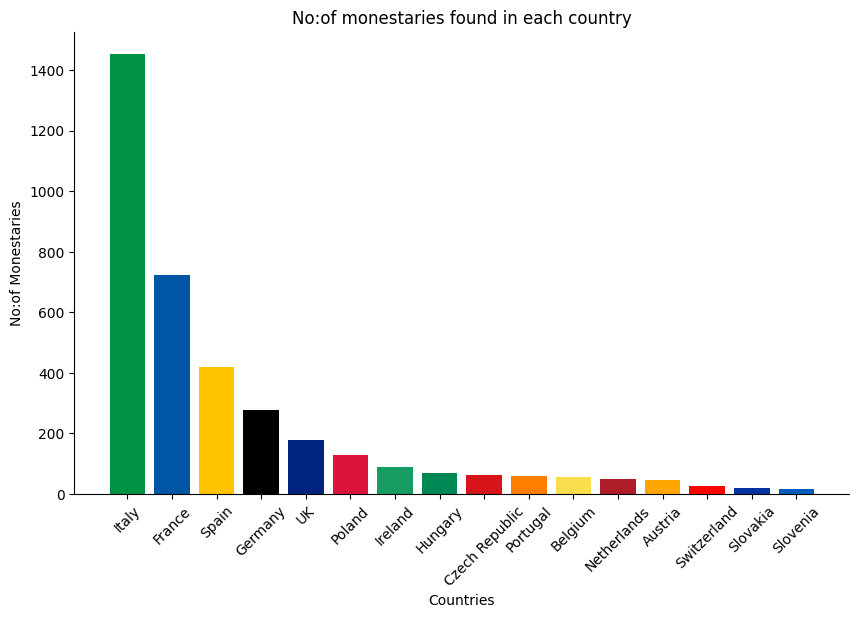

In [ ]:
fig,ax=plt.subplots(figsize=(10,6))
colors=['#009344', '#0055A4', '#FFC300', '#000000', '#00247D', '#DC143C', '#169B62', '#008855', '#D7141A', '#FF7F00',
        '#FADE4E', '#AE1C28', '#FFA500', '#FF0000', '#0033A0', '#005CBF']
ax.bar(sample.index,sample["Country"],color=colors,label=['Italy', 'France', 'Spain', 'Germany', 'UK', 'Poland', 'Ireland', 'Hungary',
                                                        'Czech Republic', 'Portugal', 'Belgium', 'Netherlands', 'Austria', 'Switzerland',
                                                          'Slovakia', 'Slovenia'])
plt.xticks(rotation=45)
#plt.legend()
ax.set_xlabel("Countries")
ax.set_ylabel("No:of Monestaries")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.title("No:of monestaries found in each country");

_____________________

# Part B – Training classifiers

7.	Define a variable X corresponding to the Starting and Ending columns of the dataset, and a variable y corresponding to the Monastery_index column. [1 mark]

In [ ]:
X=d1.loc[:,["Starting","Ending"]]
y=d1["Monastery_index"]

8.	Perform a train-test split, separating X and y into a training test and a test set, leaving 33% of the data in the test set. [1 mark]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42)

9.	Classification using a Perceptron:

a)	Fit a perceptron to the training data, and use it to predict y values for the test set.
[1 mark]

b)	Calculate the fraction of data points in the test set where the predicted y values and the actual y values differ. This fraction should be equal to zero if the prediction is perfect, and equal to 1 if the prediction is wrong for 100% of the test set. Print the value of that fraction in decimals (like 0.01, 0.2394, or 0.9999923).  [2 marks]

c)	Plot a confusion matrix showing how well the classifier performs on the test set. [1 mark]

d)	Treating “Franciscan” as “Positive” and “Cistercian” as “Negative”, Print out the precision, recall, accuracy and F1 score of the perceptron. [2 marks]

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV

# Create a Perceptron classifier
perc = Perceptron(random_state=42)

# Define a grid of hyperparameters to search
param_grid = {
    'penalty': ['l2', 'l1'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0]
}

# Perform grid search using cross-validation
grid_search = GridSearchCV(perc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best estimator
best_perceptron = grid_search.best_estimator_
y_pred=best_perceptron.predict(X_test)
rmse=sqrt(mean_squared_error(y_test,y_pred))
# Evaluate the best estimator on your test set
accuracy = best_perceptron.score(X_test, y_test)
print(f"Best Perceptron Accuracy: {accuracy}")
print(f"Best Perceptron RMSE: {rmse}")
print(f"Predictions:{y_pred}")

Best Perceptron Accuracy: 0.7907742998352554
Best Perceptron RMSE: 0.45741195892187236
Predictions:[1 1 1 ... 1 1 1]


In [ ]:
print(f"fraction:{1-accuracy}")

fraction:0.20922570016474462


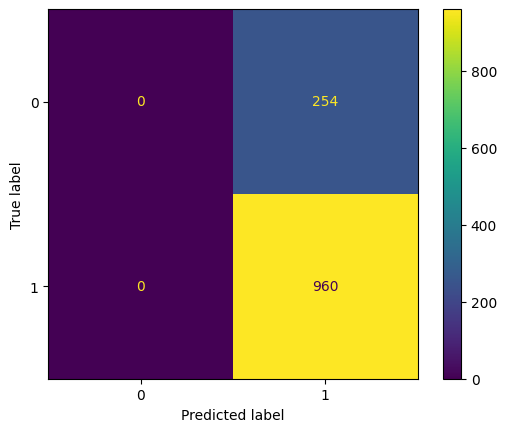

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

Precision: 0.7907742998352554
Recall: 1.0
Accuracy: 0.7907742998352554
F1 Score: 0.8831646734130635


10.	Classification using Logistic Regression: do the same as the question above, but using the logistic regression classifier. [4 marks]

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred_log = log_reg.predict(X_test)
accuracy=log_reg.score(X_test, y_test)

In [ ]:
print(f"Fraction: {1 - accuracy}")

Fraction: 0.023064250411861664


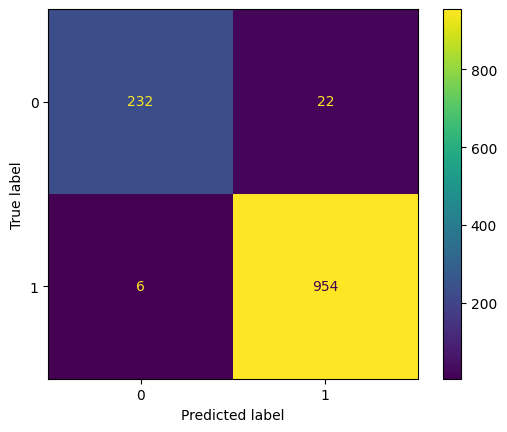

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log)

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
precision = precision_score(y_test, y_pred_log)
recall = recall_score(y_test, y_pred_log)
accuracy = accuracy_score(y_test, y_pred_log)
f1 = f1_score(y_test, y_pred_log)

# Print the results
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

Precision: 0.9774590163934426
Recall: 0.99375
Accuracy: 0.9769357495881383
F1 Score: 0.9855371900826446


For open-ended questions like the ones below, write your answers in a new cell of code, either as a commented-out line starting with #, or as a markdown cell. Indicate what question you’re answering, by copying the question as well. For example:

11.	Explain the importance of the train-test split in machine learning. What might happen if you don’t have a proper split? [ 2 marks ]

1) If there is no train-test split the model may memorize the entire data instead of learning the underlying patterns which leads to overfitting.

2) When fitting model with entire data the model may perform well for the given data but it will not work ideally in real-word data since it was not verified with a test set causing biased performance.

12.	Which classifier (Perceptron or Logistic Regression) performed better at this task? Explain how you’ve arrived at this answer. [4 marks]

1) The Logistic Regression model performed better at the task.

2)Comparing the Confusion Matrix tables, the Logisitic Regression table seems to have fewer false positives giving it higher Precision.

3)A higher precision for Logistic Regression denotes that when it predicts a positive outcome, it is correct more often compared to the Perceptron.

4)Higher F1 score for Logistic Regression suggests that it performs well in terms of precision and recall.

13.	If you run the code from questions 8, 9, and 10 again, do the scores (precision, recall, accuracy, F1) change? Why (or why not)? Explain where those scores come from, and how do they change (or don't change) if you run the code again. [3 marks]

1) They do not change since the train_test_split and perceptron have been given the parameter random_state

2) When random state parameter is not in use then it results to different random selection of instances for the training and testing sets which can lead to variations in the model's performance metrics.

_______________

# Part C – Linear Regression

14. Read the file `dataset2.csv` into a dataframe. Make four scatterplots, with different variables (different columns) on the x and y axes, with the variable `quality` on the colour axis. For each scatterplot, choose a different pair of x and y variables, which cannot include `quality`. [1 mark]

In [ ]:
d2 = pd.read_csv("/content/drive/MyDrive/project/dataset2.csv")

In [ ]:
d2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<Axes: >

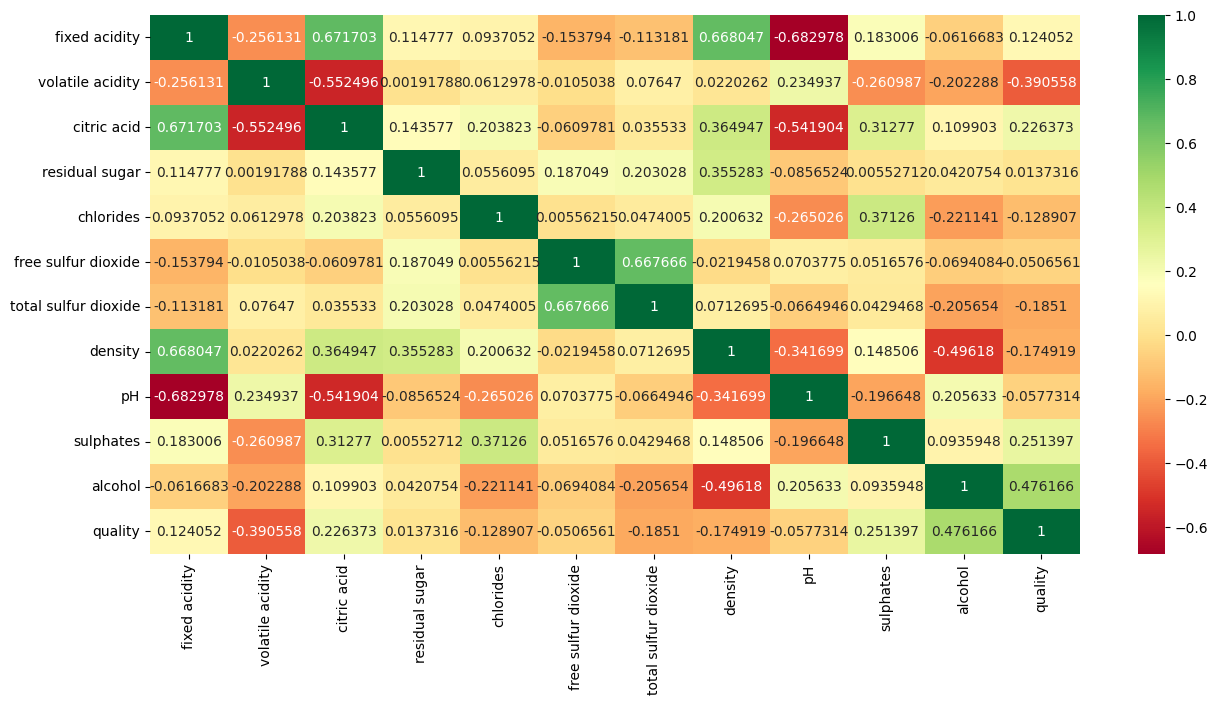

In [ ]:
fig,ax=plt.subplots(figsize=(15,7))
sns.heatmap(d2.corr(),annot=True,fmt="g",cmap="RdYlGn")

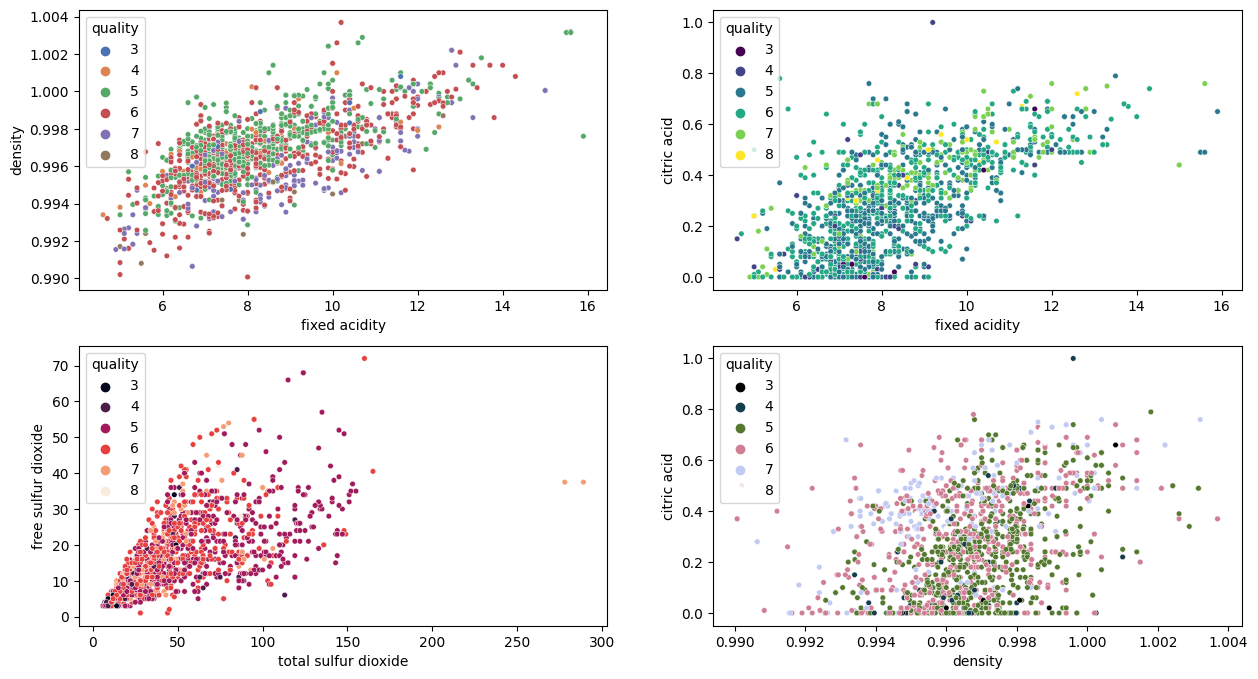

In [ ]:
fig,ax=plt.subplots(2,2, figsize=(15,8))
sns.scatterplot(x="fixed acidity",y="density",data=d2,hue="quality",ax=ax[0,0],palette="deep",s=16)
sns.scatterplot(y="citric acid",x="fixed acidity",data=d2,hue="quality",ax=ax[0,1],palette="viridis",s=16)
sns.scatterplot(x="total sulfur dioxide",y="free sulfur dioxide",data=d2,hue="quality",ax=ax[1,0],palette="rocket",s=16)
sns.scatterplot(x="density",y="citric acid",data=d2,hue="quality",ax=ax[1,1],palette="cubehelix",s=16);

15. Print the Pearson correlation between the pairs of variables you have included in the scatterplots.
For every pair of variables, print the names of the variables, and the corresponding correlation.
[1 mark]

In [ ]:
from scipy import stats
print("Fixed Acidity and Density:",stats.pearsonr(d2["fixed acidity"],d2["density"]))
print("Citric Acid and Fixed Acidity:",stats.pearsonr(d2["citric acid"],d2["fixed acidity"]))
print("Free Sulfur Dioxide and Total Sulfur Dioxide:",stats.pearsonr(d2["free sulfur dioxide"],d2["total sulfur dioxide"]))
print("Citric Acid and Density:",stats.pearsonr(d2["citric acid"],d2["density"]))

Fixed Acidity and Density: PearsonRResult(statistic=0.6680472921189734, pvalue=3.0747470608605733e-207)
Citric Acid and Fixed Acidity: PearsonRResult(statistic=0.6717034347641061, pvalue=2.5353210618194846e-210)
Free Sulfur Dioxide and Total Sulfur Dioxide: PearsonRResult(statistic=0.6676664504810215, pvalue=6.40472295468106e-207)
Citric Acid and Density: PearsonRResult(statistic=0.36494717521125075, pvalue=1.478795081448916e-51)


16. Linear regression: [2 marks]
    
a) Choosing the input variable X corresponds to any three columns of the dataset, except for `quality`, and the variable y corresponds to the `quality` column.

b) Fit a linear regression between X and y.

c) Print out the R2 score of the linear regression.

d) Print out the linear regression model’s slope coefficients and intercept.

In [ ]:
X=d2.loc[:,["fixed acidity","density","citric acid"]]
X1=d2.loc[:,["alcohol","sulphates","citric acid"]]
y=d2["quality"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.33,random_state=42,shuffle=True)
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
R2 = lin_reg.score(X_test,y_test)
print("R2:",R2)

R2: 0.26578466836298587


In [ ]:
print("Slope:", lin_reg.coef_)
print("Intercept:", lin_reg.intercept_)

Slope: [0.35767313 0.69507576 0.3728783 ]
Intercept: 1.3382489302409741


17. K-fold cross-validation [3 marks]

a) Using the same X and y variables defined in the question above, perform a K-fold cross-validation of the linear regression model, with K = 10.

b) For each fold, calculate the R2 score.

c) Print the mean and standard deviation of the five R2 scores.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
fold = KFold(n_splits = 10, shuffle = True, random_state = 42)
score = cross_val_score(lin_reg,X_test,y_test,scoring="r2",cv=fold)
print(score)

[0.35870223 0.10991852 0.39036715 0.48988838 0.38245441 0.12003073
 0.20275664 0.19407241 0.3295117  0.26677272]


In [ ]:
from statistics import mean , stdev
print("Mean:",mean(score))
print("Standard Deviation:",stdev(score))

Mean: 0.2844474891510616
Standard Deviation: 0.1261487319049009


18.	If, rather than choosing three columns, you had used more columns to predict quality, would the R2 score of your model necessarily be higher? Why/why not? In which circumstances would it be higher or not? (Feel free to try it! But please provide a justification for your answer) [3 marks]

1)Adding more features does not necessarily mean better R2 score for your model since it depends on various factors

2)Adding more features increases the risk of overfitting and adding higly correlated features can destabilize the model

3)Adding more features is beneficial depending on the nature of the data and when you have a large number of rows or when your model is underfitting.

4) In this case adding more columns increased the R2 score because it could be understand more of the underlying patterns withing the dataset.

In [ ]:
X2=d2.loc[:,["fixed acidity",	"volatile acidity",	"citric acid","residual sugar",	"chlorides","total sulfur dioxide",	"density",	"pH",	"sulphates","alcohol"]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.33,random_state=42,shuffle=True)
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
R2 = lin_reg.score(X_test,y_test)
print("R2:",R2)

R2: 0.3565810641097632


19.	Imagine you have two linear regressions, one with R2 = 0.80 and another with R2 = 0.90. Under what circumstances would the first model be preferable over the second one? What if instead you had two classifiers, one with accuracy = 80% and another with accuracy = 90%? [3 marks]

1) A model with R2 = 0.80 is prefferable when R2=0.90 exhibits signs of overfitting, meaning it performs exceptionally well on the training data but struggles on new data.

2) The model with R2 = 0.80 is also more prefferable when it is the more simpler model and more interpretable.

3) Similar to Linear regression, the accuracy = 80% is more preferable when the latter shows signs of overfitting and when the classifier model with accuracy=80% is much simpler and therefore easier to interpret and understand.

_____________________

# Part D – Clustering

20. K-means clustering:

a) Read the file `dataset3.csv` into a dataframe.

b) Define a variable X corresponding to the `Longitude` and `Latitude` columns of the dataset.

c) Using the K-means clustering algorithm and the variable X, cluster the trees 3 times, using k = 5, 10, 15.

d) Make a scatterplot showing the results of each clustering, with one colour for each cluster.
Suggestion: use a categorical colour map such as tab10 or tab20.
[2 marks]

In [ ]:
d3 = pd.read_csv("/content/drive/MyDrive/project/dataset3.csv")

In [ ]:
d3

,Tree_ID,Address,Town,Tree_Species,Species_Desc,Common_Name,Age_Desc,Height,Spread,Trunk,Actual_Trunk,Condition,Latitude,Longitude
0,27092,"Clonard Court, Balbriggan",Balbriggan,ACSA,Acer saccharinum,Silver Maple,Semi-Mature,5.1-10 metres,3 to 6 metres,11cm to 20cm,18cm,Good,53.606325,-6.186424
1,29144,"Ridgewood Avenue, Forrest Great",Swords South,TICO,Tilia cordata,Small-Leafed Lime,Young,Up to 5 metres,Up to 3 metres,1cm - 10cm,10cm,Fair - Poor,53.447465,-6.247613
2,29160,"Ridgewood Avenue, Forrest Great",Swords South,TICO,Tilia cordata,Small-Leafed Lime,Young,Up to 5 metres,Up to 3 metres,11cm to 20cm,11cm,Good,53.447695,-6.248258
3,29400,"Ridgewood Avenue, Forrest Great",Swords South,TICO,Tilia cordata,Small-Leafed Lime,Young,Up to 5 metres,Up to 3 metres,1cm - 10cm,10cm,Good,53.445606,-6.246236
4,246560,"Lanesborough Grove, Saint Margaret's",Santry,TICO,Tilia cordata,Small-Leafed Lime,Young,Up to 5 metres,3 to 6 metres,11cm to 20cm,13cm,Fair to Good,53.404309,-6.291646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23615,179480,"Lambay View, Rush",Rush,SOIN,Sorbus intermedia,Swedish Whitebeam,Young,Up to 5 metres,Up to 3 metres,21cm to 30cm,21cm,Fair,53.535117,-6.091691
23616,174456,"Westbrook Lawn, Balbriggan",Balbriggan,TISP,Tilia spp.,Lime,Young,Up to 5 metres,Up to 3 metres,1cm - 10cm,6cm,Good,53.608885,-6.198850
23617,175420,"Woodland Park, Rush",Rush,ACPL,Acer platanoides,Norway Maple,Young,Up to 5 metres,Up to 3 metres,1cm - 10cm,9cm,Good,53.527933,-6.100193
23618,179864,"Clifflands, Rush",Rush,PRSPA,Prunus serrulata,Japanese Cherry,Semi-Mature,5.1-10 metres,3 to 6 metres,21cm to 30cm,25cm,Good,53.533870,-6.092505


In [ ]:
X=d3[["Longitude","Latitude"]]
from sklearn.cluster import KMeans

In [ ]:
k_values = [5, 10, 15]
kmeans_labels=[]
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    km = kmeans.fit_predict(X)
    kmeans_labels.append(km)
    d3['cluster_' + str(k)] = km

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<ipython-input-41-710e7577102e>:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], c=colors[cluster], label=f'Cluster {cluster + 1}')


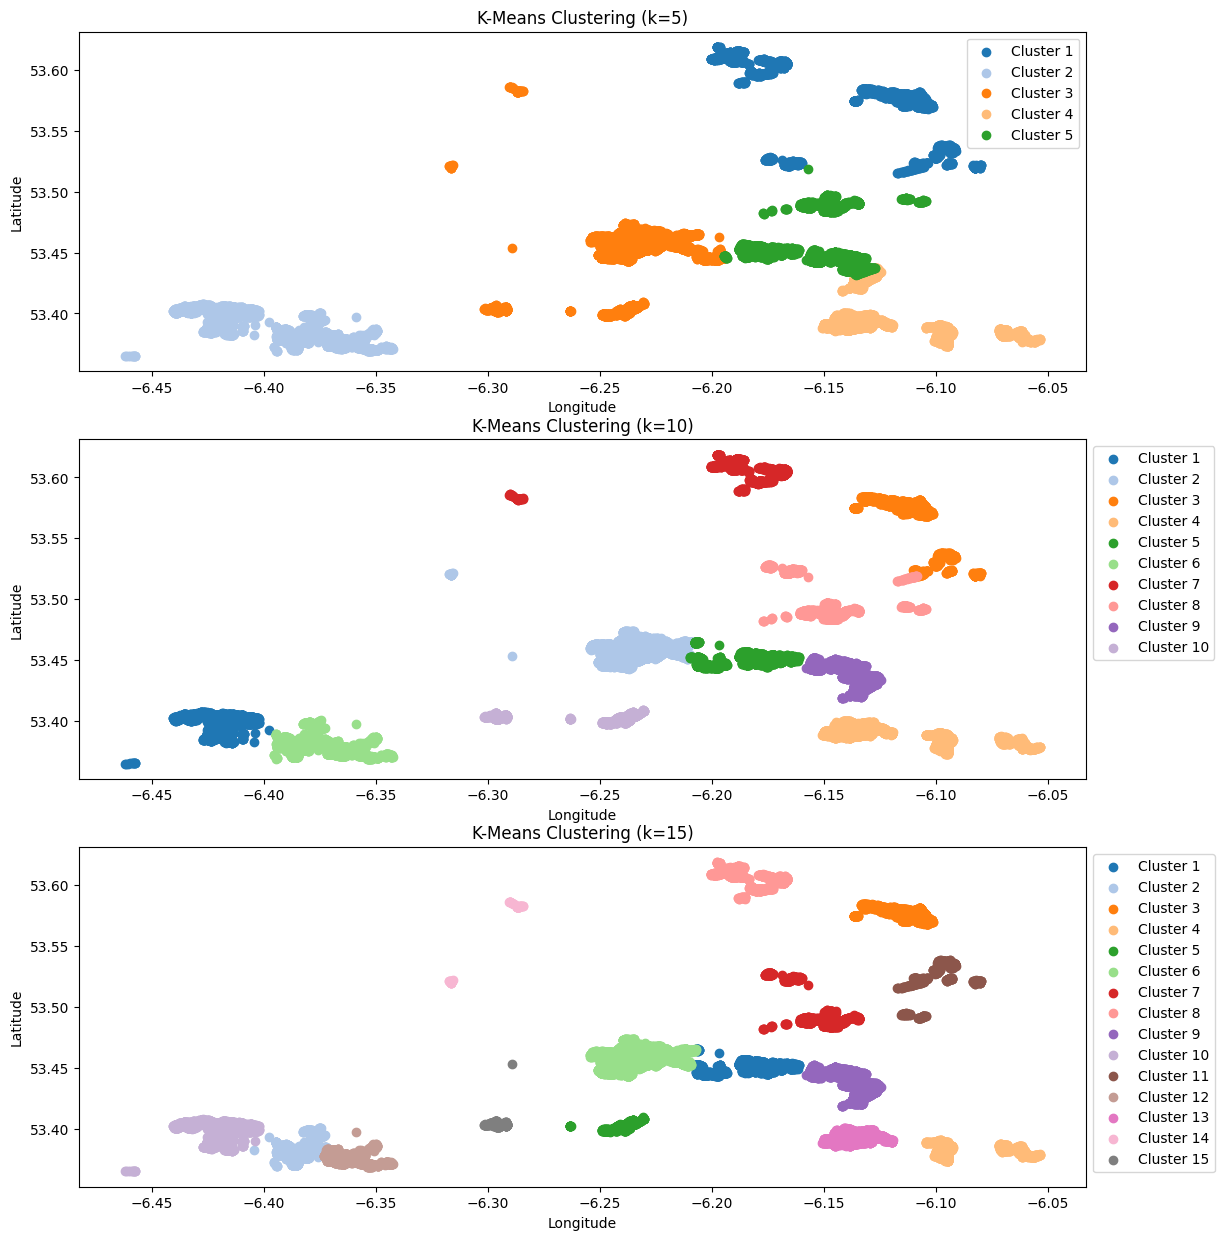

In [ ]:
colors=plt.cm.tab20(range(15))
# Create a scatterplot for each clustering result
plt.figure(figsize=(13, 15))
for i, k in enumerate(k_values):
    plt.subplot(3, 1, i + 1)
    for cluster in range(k):
        cluster_data = d3[d3['cluster_' + str(k)] == cluster]
        plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], c=colors[cluster], label=f'Cluster {cluster + 1}')
    plt.title(f'K-Means Clustering (k={k})')
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend(bbox_to_anchor=(1,1))

21. DBSCAN clustering:

a) Using the same X variable as above, using the DBSCAN clustering algorithm, cluster the trees a total of 4 times, setting the eps parameter to 0.001, 0.005, 0.01, 0.05.

b) Make a scatterplot showing the results of each clustering, with one colour for each cluster.
Suggestion: use a categorical colour map such as tab10 or tab20.
[2 marks]

In [ ]:
from sklearn.cluster import DBSCAN
cluster_labels=[]
eps_values=[0.001,0.005,0.01,0.05]
for i in eps_values:
  dbscan=DBSCAN(eps=i)
  labels = dbscan.fit_predict(X)
  cluster_labels.append(labels)
  d3['dbscan_' + str(i)] = labels


In [ ]:
d3.head()

,Tree_ID,Address,Town,Tree_Species,Species_Desc,Common_Name,Age_Desc,Height,Spread,Trunk,...,Condition,Latitude,Longitude,cluster_5,cluster_10,cluster_15,dbscan_0.001,dbscan_0.005,dbscan_0.01,dbscan_0.05
0,27092,"Clonard Court, Balbriggan",Balbriggan,ACSA,Acer saccharinum,Silver Maple,Semi-Mature,5.1-10 metres,3 to 6 metres,11cm to 20cm,...,Good,53.606325,-6.186424,0,6,7,0,0,0,0
1,29144,"Ridgewood Avenue, Forrest Great",Swords South,TICO,Tilia cordata,Small-Leafed Lime,Young,Up to 5 metres,Up to 3 metres,1cm - 10cm,...,Fair - Poor,53.447465,-6.247613,2,1,5,1,1,1,0
2,29160,"Ridgewood Avenue, Forrest Great",Swords South,TICO,Tilia cordata,Small-Leafed Lime,Young,Up to 5 metres,Up to 3 metres,11cm to 20cm,...,Good,53.447695,-6.248258,2,1,5,1,1,1,0
3,29400,"Ridgewood Avenue, Forrest Great",Swords South,TICO,Tilia cordata,Small-Leafed Lime,Young,Up to 5 metres,Up to 3 metres,1cm - 10cm,...,Good,53.445606,-6.246236,2,1,5,1,1,1,0
4,246560,"Lanesborough Grove, Saint Margaret's",Santry,TICO,Tilia cordata,Small-Leafed Lime,Young,Up to 5 metres,3 to 6 metres,11cm to 20cm,...,Fair to Good,53.404309,-6.291646,2,9,14,2,2,2,0


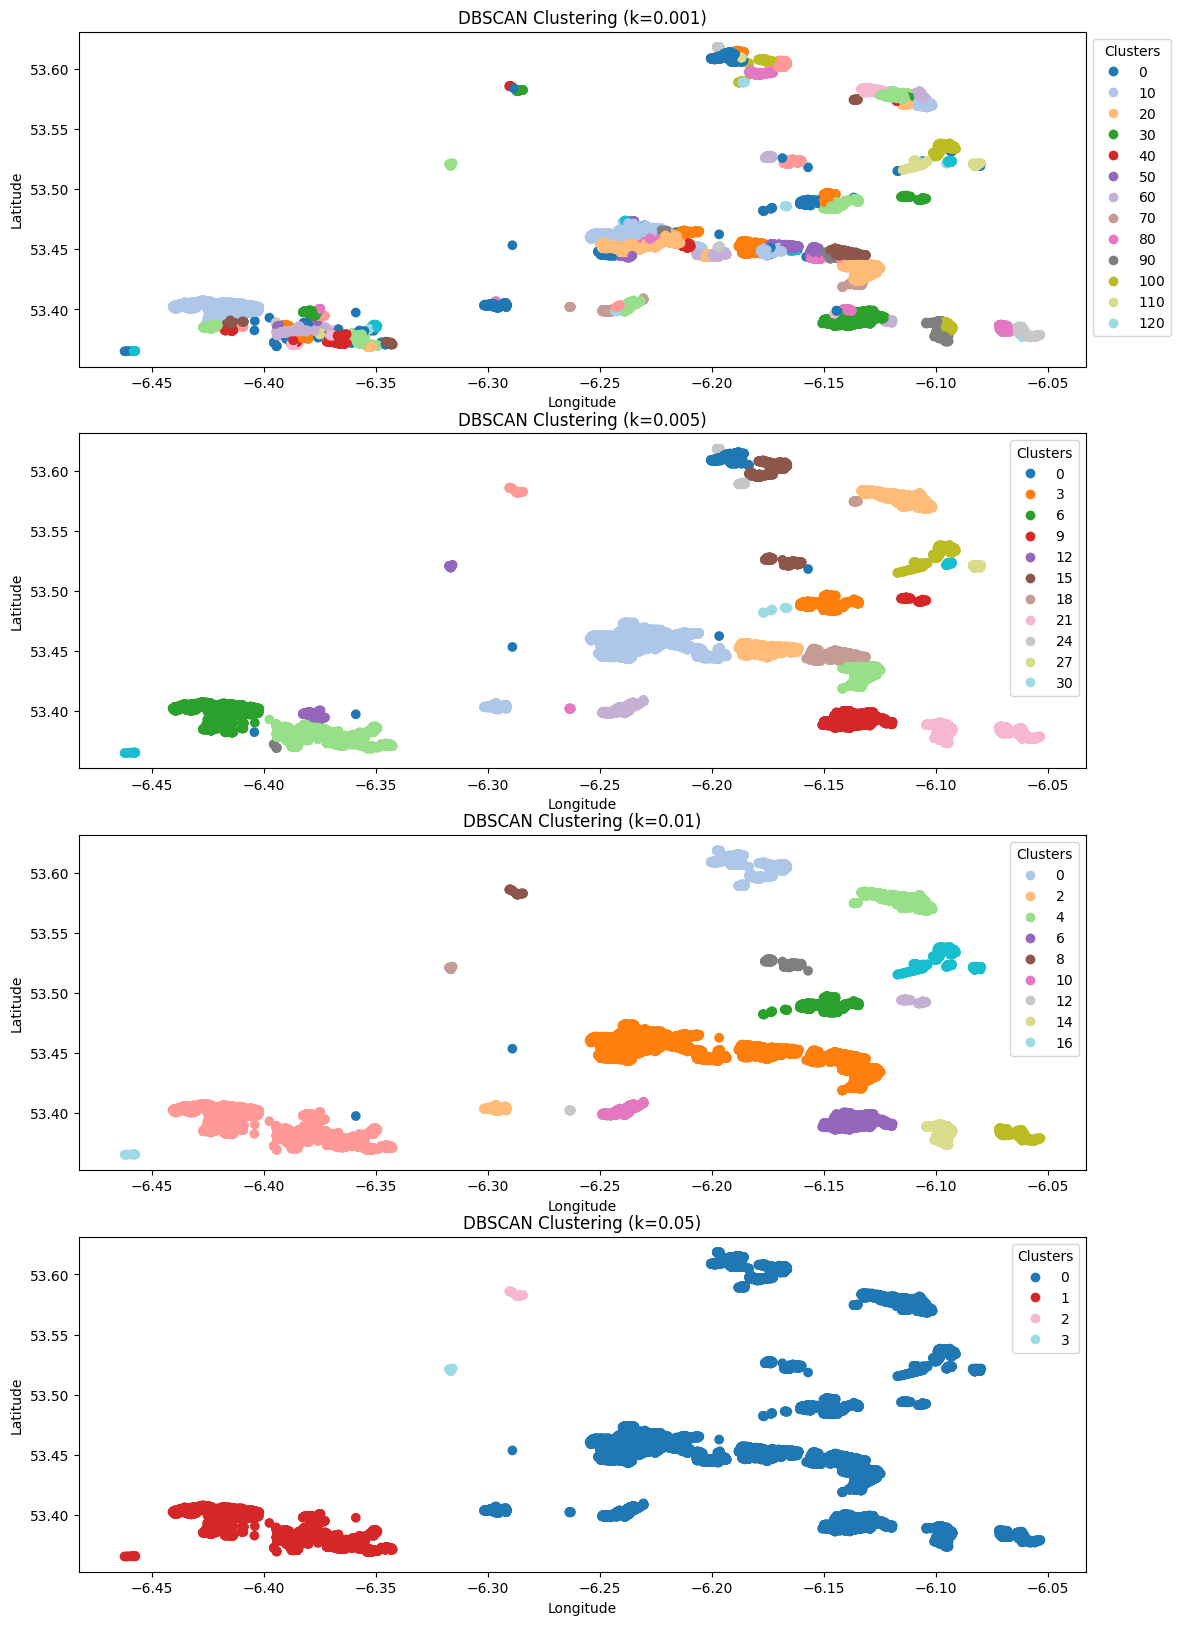

In [ ]:
plt.figure(figsize=(13, 20))
for i in range(len(cluster_labels)):
  plt.subplot(4,1,i+1)
  scatter = plt.scatter(d3["Longitude"],d3["Latitude"],c=cluster_labels[i],cmap="tab20")
  #ax=sns.scatterplot(x="Longitude",y="Latitude",data=d3,hue=cluster_labels[i])
  plt.title(f'DBSCAN Clustering (k={eps_values[i]})')
  plt.xlabel("Longitude")
  plt.ylabel("Latitude")
  plt.legend(*scatter.legend_elements(), title="Clusters",bbox_to_anchor=(1,1))


22. Using the Silhouette score, compare the 3 runs of K-means and the 4 runs of DBSCAN. Which one of the 7 runs produces the
best clustering, according to the Silhouette score? [2 marks]

In [ ]:
from sklearn.metrics import silhouette_score
for i in range(len(kmeans_labels)):
  silhouette_avg = silhouette_score(X, kmeans_labels[i])

  print(f"K-means clustering with k = {k_values[i]}")
  print(f"Silhouette Score: {silhouette_avg}\n")


K-means clustering with k = 5
Silhouette Score: 0.5735612206824604

K-means clustering with k = 10
Silhouette Score: 0.6237793445586057

K-means clustering with k = 15
Silhouette Score: 0.6629214983213633



In [ ]:
for y in range(len(cluster_labels)):
  silhouette_avg = silhouette_score(X, cluster_labels[y])

  print(f"DBSCAN clustering with eps = {eps_values[y]}")
  print(f"Silhouette Score: {silhouette_avg}\n")


DBSCAN clustering with eps = 0.001
Silhouette Score: 0.24654779191419357

DBSCAN clustering with eps = 0.005
Silhouette Score: 0.5407076619493659

DBSCAN clustering with eps = 0.01
Silhouette Score: 0.393094609216632

DBSCAN clustering with eps = 0.05
Silhouette Score: 0.43883380804344585



#K-means cluster with k=15 produced the best clustering for silhouette score

23. Using the Davies-Bouldin score, compare the 3 runs of K-means and the 4 runs of DBSCAN. Which one of the 7 runs produces the best clustering according to the Davies-Bouldin score? [2 marks]

In [ ]:
from sklearn.metrics import davies_bouldin_score
for i in range(len(kmeans_labels)):
  davies_bouldin_avg = davies_bouldin_score(X, kmeans_labels[i])

  print(f"K-means clustering with k = {k_values[i]}")
  print(f"Davies Bouldin Score: {davies_bouldin_avg}\n")


K-means clustering with k = 5
Davies Bouldin Score: 0.6181045654656658

K-means clustering with k = 10
Davies Bouldin Score: 0.5334253184854487

K-means clustering with k = 15
Davies Bouldin Score: 0.4351717623920141



In [ ]:
for y in range(len(cluster_labels)):
  davies_bouldin_avg = davies_bouldin_score(X, cluster_labels[y])

  print(f"DBSCAN clustering with eps = {eps_values[y]}")
  print(f"Davies Bouldin Score: {davies_bouldin_avg}\n")


DBSCAN clustering with eps = 0.001
Davies Bouldin Score: 1.304980996503088

DBSCAN clustering with eps = 0.005
Davies Bouldin Score: 0.8701655709920809

DBSCAN clustering with eps = 0.01
Davies Bouldin Score: 0.5967046437447137

DBSCAN clustering with eps = 0.05
Davies Bouldin Score: 0.44518863489975385



#K-means cluster with k=15 produced the best clustering for Davies Bouldin score as well

24. Using another clustering algorithm (not K-means, not DBSCAN), and a range of hyperparameter values if appropriate, cluster the trees according to their latitude and longitude, as above. According to the silhouette and Davies-Bouldin scores, does any of your model runs produce better clustering? [2 marks]

In [ ]:
from sklearn.cluster import AgglomerativeClustering
n_clusters_values = [2,3,4,5]
n_cluster_labels=[]
for i in n_clusters_values:
  aggc=AgglomerativeClustering(n_clusters=i)
  labels = aggc.fit_predict(X)
  n_cluster_labels.append(labels)
  d3['aggc_' + str(i)] = labels

In [ ]:
for j in range(len(n_cluster_labels)):
  silhouette_avg = silhouette_score(X, n_cluster_labels[j])

  print(f"Agglomerative Clustering with n_clusters = {n_clusters_values[j]}")
  print(f"Silhouette Score: {silhouette_avg}\n")


Agglomerative Clustering with n_clusters = 2
Silhouette Score: 0.6473669227596036

Agglomerative Clustering with n_clusters = 3
Silhouette Score: 0.6037740179437524

Agglomerative Clustering with n_clusters = 4
Silhouette Score: 0.5938352638722624

Agglomerative Clustering with n_clusters = 5
Silhouette Score: 0.5797926764830069



In [ ]:
for j in range(len(n_cluster_labels)):
  davies_bouldin_avg = davies_bouldin_score(X, n_cluster_labels[j])

  print(f"Agglomerative Clustering with n_clusters = {n_clusters_values[j]}")
  print(f"Davies Bouldin Score: {davies_bouldin_avg}\n")


Agglomerative Clustering with n_clusters = 2
Davies Bouldin Score: 0.40971806863994836

Agglomerative Clustering with n_clusters = 3
Davies Bouldin Score: 0.5839787599869948

Agglomerative Clustering with n_clusters = 4
Davies Bouldin Score: 0.5850238720133517

Agglomerative Clustering with n_clusters = 5
Davies Bouldin Score: 0.6239010143363466



# Agglomerative Clustering with n_cluster=2 produced the best clustering for Davies Bouldin Score

25. Usually, DBSCAN takes longer than K-means to run, and the time it takes to run is affected by the eps parameter. Explain why that is the case. [4 marks]

1) DBSCAN takes longer than K-means because it is a density-based cluster thats starts from one point and requires time to explore the local neighborhood of each data point to determine density and cluster group.

2)eps refers to the radius it applies on each point for a point to be considered a neighbour of another point.

3) When eps is small it produces more fine clusters, increasing the computation required to identify these clusters.

4) When eps is large it produces more generalized clusters, decreasing the computation required to identify these clusters.

26. Provide an example of one case in which it might be better to use DBSCAN rather than K-means, and an example of one case in which it might be better to use K-means rather than DBSCAN. Explain why, in both cases. [4 marks]

1) For a data containing geographical cooridinates of each user for an app, the app might tend to be very popular in a certain region, resulting in varying densities across the globe. In this case DBSCAN would be much preferable since it can identify clusters of arbitrary shapes.

2) For a data containing user preferences for movies, with features like genre and ratings given to different movies. This data can be distinguished into several genres for movies. In this case K-Means would be much preferable since It partitions the data into k clusters assuming each cluster is spherical.

_____________________

# Part E – Model selection

27. Consider the figure in the PDF and compare models A and B. In each case, what difference would it make to add more training examples to the training set? Explain your reasoning. [4 marks]

Increase number of training examples on training set may not result in significant improvements for Model A, as the model is under fit the curve might drop or stay flat indicating that addition of more training examples can't improve the model performance on unseen data.

The addition of training examples on training set on Model B will better it's performance. This is due to the fact that Model B is an overfit model and addition of training examples will decrease validation error and improve the model's performance.

28.	Consider the second figure in the PDF and compare models A, B, and C. What is the difference between the three models? How does that relate to the bias-variance trade-off? [6 marks]

1) Model A is underfit(high bias). Both training and validation loss are similar but high. It may be too simple to capture underlying patterns within the data. It can be improved by increasing the model's complexity and adding more features.

2) Model B achieves a good balance between bias and variance, representing a well tuned model. Both training and validation loss are similiar and low. Not much needs to be done to improve the model.

3) Model C is overfit(high variance). The model has a low training loss but high validation loss. It may be too complex and fails to generalize. It can be improved by decreasing model's complexity and increasing size of training dataset.

29.	What is overfitting? Why is that a problem, and how can one avoid it? [3 marks]

Overfitting is when a model is too complex and lacks the ability to generalize. It is a model that is very sensitive to outliers. This is a problem because it would perform well on the training set but when given unseen data it would perform poorly. Overfitting can be avoided by decreasing model's complexity, addition of more training data, decreasing parameters, data preprocessing, some basic feature engineering,etc.

________________

# Part F – Dimensionality reduction

Consider a scenario where you are working with a complex high-dimensional dataset derived from a biomedical application to detect a disease. The data is expected to have both linear and non-linear relationships, and you aim to reduce the dimensionality for the following purposes: first, to visualize the data in a lower-dimensional space to identify potential clusters or patterns that might indicate different disease states, and second, to preprocess the data for a downstream machine learning task, such as classification of samples into healthy or diseased states.

30.	Discuss the advantages and disadvantages of using PCA, t-SNE, and UMAP for the visualization purpose, considering factors such as the preservation of local and global structures, computational efficiency, and the potential introduction of artifacts. [3 marks]

1) PCA is used to decrease linear dimensionality of a dataset, it shows that N dimensional data is well defined in less than N dimension. Use of PCA gives model better scores, it preserves global structures and is computanionally efficient. PCA is uninformative when all variables are equally important and uncorellated. PCA often leads to loss of information when we reduce dimensions and is highly sensitive to outliers.

2) t-SNE is very good at preserving local structures, capturing relationship between nearby points. It is capable of revealing non linear patterns in complex datasets. It is however computationally inefficient due to its ability to preserve local structures and therefore is not practical for large datasets.

3) UMAP is useful in preserving both local and global structures and provides and optimal balance. It is computationally more efficient than t-SNE . However UMAP may require experimentation with hyperparameters as it may be sensitive to them.

31.	Explain how the choice between these dimensionality reduction techniques might change when, after visualising, you want to do the preprocessing for the machine learning task. [3 marks]

The choice of dimensionality reduction techniques depends on the overall goal and nature of the dataset. In cases where the dataset is large, PCA would be much be much preferable due to it being computaionally more efficient than t-SNE and UMAP. In cases where data shows non-linear relationships the use of t-SNE or UMAP are much preffered. Try using t-SNE or UMAP to visualize the data at first in order to gain insights which is really helpful in complex datasets. Then further proceed with preprocessing with PCA if noise reduction is needed or proceed with t-SNE or UMAP if either you want to preserve local structure or both global and local.

32.	Discuss the role of interpretability and stability in the choice of dimensionality reduction technique for both tasks. How might the stochastic nature of t-SNE and UMAP influence the reproducibility of your analyses, and how can PCA's linear assumptions limit its usefulness in capturing complex relationships in the data? [3 marks]

In terms of Interpretability, since PCA performs linear combination of features it provides an interpretable output compared to t-SNE and UMAP which are good for visualization but the real output data is not very interpretable. PCA is also more stable than t-SNE and UMAP because it creates the same output given the same features and parameters. Both t-SNE and UMAP use random intial points and therefore each time the techniques might give a different output for same features and parameters. PCA's linear assumption assumes the same even for non-linear relations and therefore are not represented accurately leading to loss of information and new insights.

________________

# Part G – Applications of Machine Learning

33.	Discuss a scenario where a high accuracy rate might be misleading in evaluating the performance of a classifier. What other metrics would you consider, and why? [3 marks]

High accuracy rate is misleading in cases where the dataset is imbalanced. For example, question 9 of this coursework considers a Perceptron which when fit to the model gives all predicted outputs as 1. Under normal circumstances this model would be deemed pretty bad but since most of dataset1 consists of 1, the true positive rate of the perceptron was pretty high giving an accuracy of 80%.

Other metrices to consider:

1)Precision is one of the most important metrices to consider. It denotes the accuracy when a classifier predicts a positive outcome.(TP/TP+FP) This metrice is useful when goal is to properly deem a variable as positive outcome and when cost of false positive is high.

2) Recall measures the ability of a classifier to predict a positive outcome.(TP/TP+FN). This metrice is useful when goal is to avoid missing a positive outcome at all costs.


34. Given a classification task and a dataset, sometimes it’s impossible to make a classifier with 100% precision and 100% recall simultaneously. Explain why. [3 marks]

Precision and recall have an inverse relation and therefore there is an inherent trade-off. Sometimes the data is imbalanced where one class dominates the rest and predicting the positive outcome is rare. The precision in such cases would be high since it is being selective but it may miss some true positives giving the model less recall. Either precision or recall may take the upperhand in classification tasks where either the cost of False positive is higher or the cost of False negative is higher.

35. In the case of the question above, the data scientist might have to choose between having higher precision or higher recall. Provide an example where it’s preferable to get high recall and low precision (and explain why), and another example where it’s preferable to have high precision and low recall (and explain why). [4 marks]

Like mentioned above, either precision or recall can be focused upon based on classification goals. For example consider medical testing for covid, Higher recall is more preffered than precision because it is crucial to identify all individuals who actually have the disease. The cost of falsely identifying someone with the disease is very less compared to falsely identifying someone as normal which could lead to further spreading of the disease.

An example for where high precision is preffered over high recall is when making a classifier which identifies if emails are spam or not. With higher precision the model will avoid classifying important emails as spam. The cost of falsely identifying an email as spam is higher because of the crucial information important mails can contain.

Over this module we explained many examples where a machine learning algorithm was trained on a dataset and became reasonably good at a task, but had a fundamental flaw in its training dataset or feature engineering that ultimately made the model inaccurate or inappropriate for use in real life.

36. Give an example of a machine learning algorithm trained for a particular task where it achieves high accuracy in one context, but low accuracy in another context. Explain what could cause that, how to diagnose it, and suggest a way to address it. [4 marks]

Going back to question 9, the perceptron acheived a good accuracy of 80% eventhough all it did was guess every prediction as 1. Since the dataset was inconsistent and 80% of the data was 1, the model seemed to have gotten lucky. If we were to change the perceptron's random state to 2, it would predict every result as 0. Since only 20% of the data was 0, the model achieved an accuracy of only 20%. The Data distribution was uneven in this case and caused the problem. We can diagnose such cases by evauating the model's performance on a seperate dataset or making the training data fairly split.

37. Give an example of a machine learning algorithm that might have low error in its training and testing datasets, but that still would have a fundamental flaw in its application that is not captured by the error metric. Explain why that is the case, and suggest a way to address that. [3 marks]

A machine learning model that has low error in both training and testing dataset is in a image classification model trained to identify wolf and fox. Most pictures of wolf are taken in then snow and most pictures of fox are taken in forests. The flaw in this case is that the model is relying on the background context rather than the actual features of the animals. We can address this issue by training the model on images that capture a wide range of backgrounds, lighting conditions, and contexts. This helps the modelto generalize better to different scenarios.

_________________